<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Introduction_to_Gradient_Descent_M04_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [3]:
def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

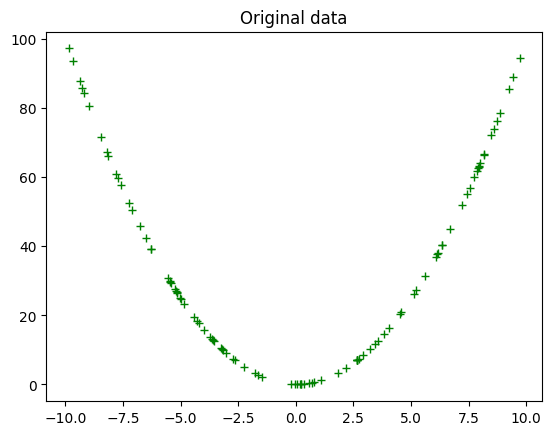

In [5]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [6]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jittered_y = random.uniform(interval_min, interval_max)
    return jittered_y

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 25)
    xs.append(x)
    ys.append(y)

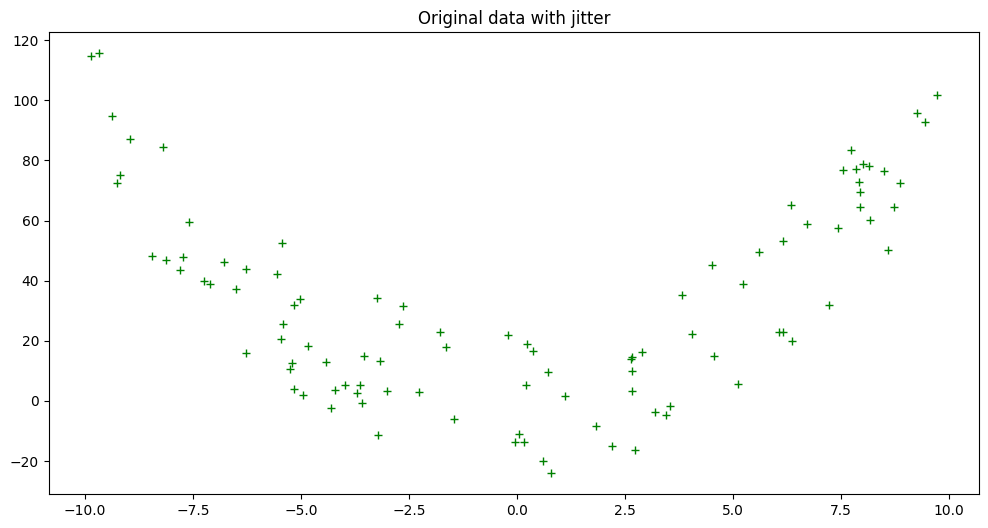

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [10]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

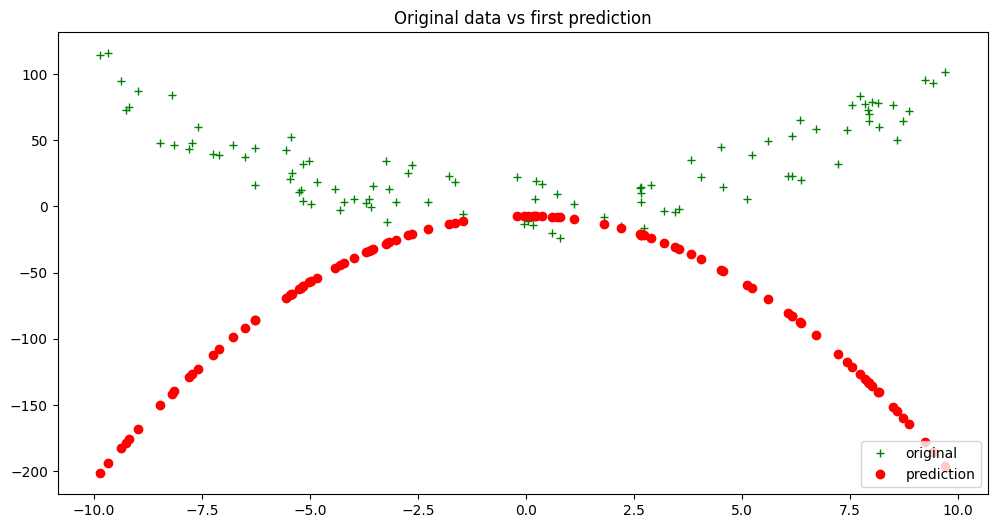

In [12]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [13]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(19383.921063199043)

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [15]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Gradients for the coefficients a, b, and c.
    """
    a_s = rand_coeffs[0]
    b_s = rand_coeffs[1]
    c_s = rand_coeffs[2]
    y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
    errors = ys - y_bar
    n = len(ys)
    a_g = (2/n) * sum(-hundred_xs * hundred_xs * errors)
    b_g = (2/n) * sum(-hundred_xs * errors)
    c_g = (2/n) * sum(-errors)
    return [a_g, b_g, c_g]

In [17]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(-0.7721655600241677), np.float64(0.007617778911066661), np.float64(-6.9783899637978735))
Now have smaller model loss: 7270.135489932307 vs 19383.921063199043


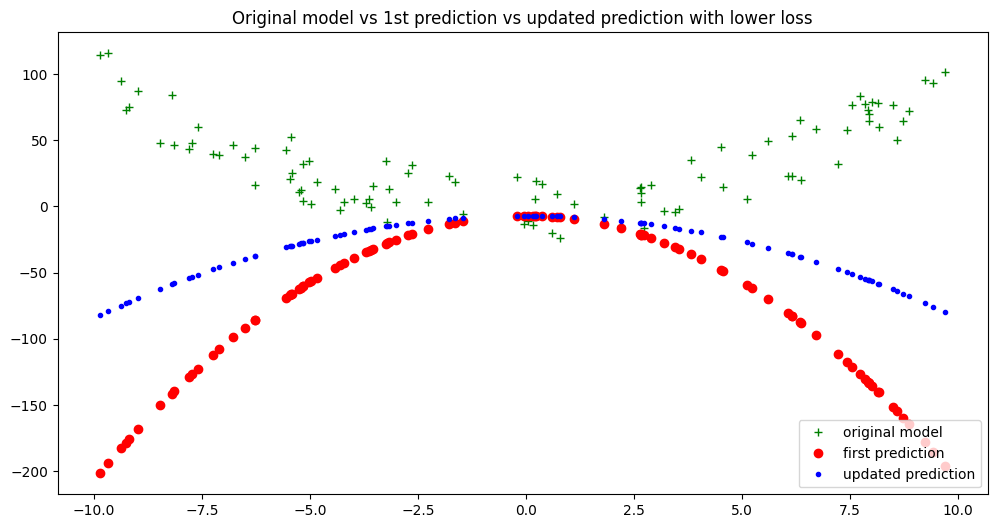

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [21]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)

In [22]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [24]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [25]:
GD = gradient_descent(30000, 0.0003)

[np.float64(845.9970764560838), np.float64(241.70015332181043), np.float64(221.8442531198829), np.float64(221.04094935540473), np.float64(220.86468591489344), np.float64(220.7147492798418), np.float64(220.57132514305016), np.float64(220.43353957316248), np.float64(220.30114509523236), np.float64(220.17392349114655), np.float64(220.051665980688), np.float64(219.93417223312107), np.float64(219.82125000626596), np.float64(219.71271481929696), np.float64(219.6083896393718), np.float64(219.50810458093557), np.float64(219.41169661716256), np.float64(219.31900930305056), np.float64(219.22989250969385), np.float64(219.14420216928323), np.float64(219.0618000304023), np.float64(218.9825534232036), np.float64(218.90633503406346), np.float64(218.8330226893362), np.float64(218.76249914783875), np.float64(218.69465190171206), np.float64(218.62937298532438), np.float64(218.56655879188668), np.float64(218.50610989747526), np.float64(218.44793089215597), np.float64(218.3919302179295), np.float64(218.33

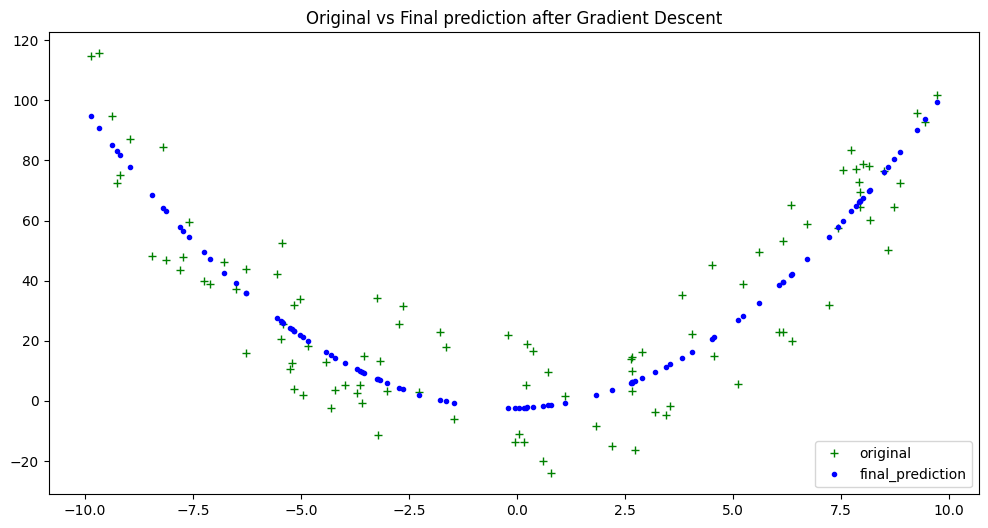

In [26]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [28]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(1.0385766869452606), np.float64(0.3987553565463157), np.float64(-2.317952787500901))
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


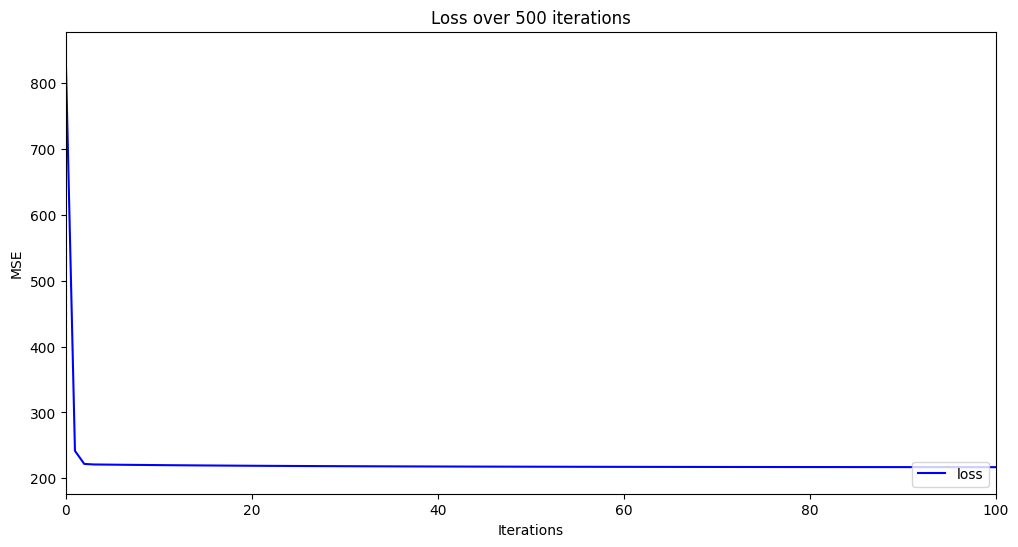

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



In [33]:
def eval_cubic(coeffs, x):
    """
    Function to evaluate a cubic polynomial given coefficients and input x.

    Args:
        coeffs: List containing the coefficients for x^3, x^2, x, and a constant.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the cubic polynomial.

    """
    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    return y

def eval_cubic_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a cubic polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients for x^3, x^2, x, and a constant.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the cubic polynomial.

    """
    a = coeffs[0] * (x ** 3)
    b = coeffs[1] * (x ** 2)
    c = coeffs[2] * x
    d = coeffs[3]
    y = a + b + c + d
    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jittered_y = random.uniform(interval_min, interval_max)
    return jittered_y

**Analysis of Learning Rate Impact**:
* **Smaller Learning Rate:** A smaller learning rate generally leads to slower convergence but might find a more precise minimum.
* **Larger Learning Rate:** A larger learning rate can speed up convergence but might overshoot the minimum and oscillate.
* **Very Large Learning Rate:** A very large learning rate can cause the loss to diverge, meaning it won't converge to a minimum at all. This is because the steps taken are too large, and the algorithm jumps around the loss landscape without settling.

In [37]:
# Experiment with a smaller learning rate
print("Results with learning rate = 0.00001:")
GD_small_lr = gradient_descent_cubic(50000, 0.00001)
print(f"Final Loss: {GD_small_lr[0]}")

# Experiment with a larger learning rate
print("\nResults with learning rate = 0.001:")
GD_large_lr = gradient_descent_cubic(50000, 0.001)
print(f"Final Loss: {GD_large_lr[0]}")

# Experiment with a very large learning rate to see if it converges
print("\nResults with learning rate = 0.1:")
GD_very_large_lr = gradient_descent_cubic(50000, 0.1)
print(f"Final Loss: {GD_very_large_lr[0]}")

Results with learning rate = 0.00001:
[np.float64(44.97071815469233), np.float64(44.9704458375689), np.float64(44.970173530381196), np.float64(44.969901233128766), np.float64(44.96962894581118), np.float64(44.96935666842799), np.float64(44.969084400978815), np.float64(44.968812143463175), np.float64(44.96853989588067), np.float64(44.968267658230836)]
Final Loss: 44.968267658230836

Results with learning rate = 0.001:


/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-695614711.py:35: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
/tmp/ipython-input-695614711.py:36: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
/tmp/ipython-input-695614711.py:38: RuntimeWarning: invalid value encountered in scalar add
  gradient_d = (-2 / n) * sum(d_s)
/tmp/ipython-input-695614711.py:40: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]
Final Loss: nan

Results with learning rate = 0.1:


/tmp/ipython-input-695614711.py:24: RuntimeWarning: overflow encountered in scalar multiply
  partial_a = x_cubed * (y - y_bar)
/tmp/ipython-input-695614711.py:36: RuntimeWarning: overflow encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
/tmp/ipython-input-695614711.py:37: RuntimeWarning: overflow encountered in scalar add
  gradient_c = (-2 / n) * sum(c_s)
/tmp/ipython-input-3326349743.py:17: RuntimeWarning: invalid value encountered in add
  y = a + b + c + d


[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]
Final Loss: nan


**Reasoning**:
We will experiment with different learning rates by running the `gradient_descent` function with varying `lr` values and observing the convergence behavior. We will then discuss the impact of the learning rate, especially a very large one.

## Increase/decrease the learning rate

### Subtask:
Increase/decrease the learning rate to see how many iterations will be take to converge. Does it even converge on a huge learning rate?

[np.float64(35.33187687242261), np.float64(35.33187686329224), np.float64(35.33187685416346), np.float64(35.33187684503633), np.float64(35.3318768359108), np.float64(35.331876826786896), np.float64(35.33187681766462), np.float64(35.33187680854396), np.float64(35.3318767994249), np.float64(35.33187679030748)]
Original Cubic Coefficients: [0.1, -0.5, 2, -3]
Final Coefficients predicted: (np.float64(0.08834090720536164), np.float64(-0.40101675970011247), np.float64(2.34047002144532), np.float64(-3.5015793964916058))
Final Loss: 35.33187679030748


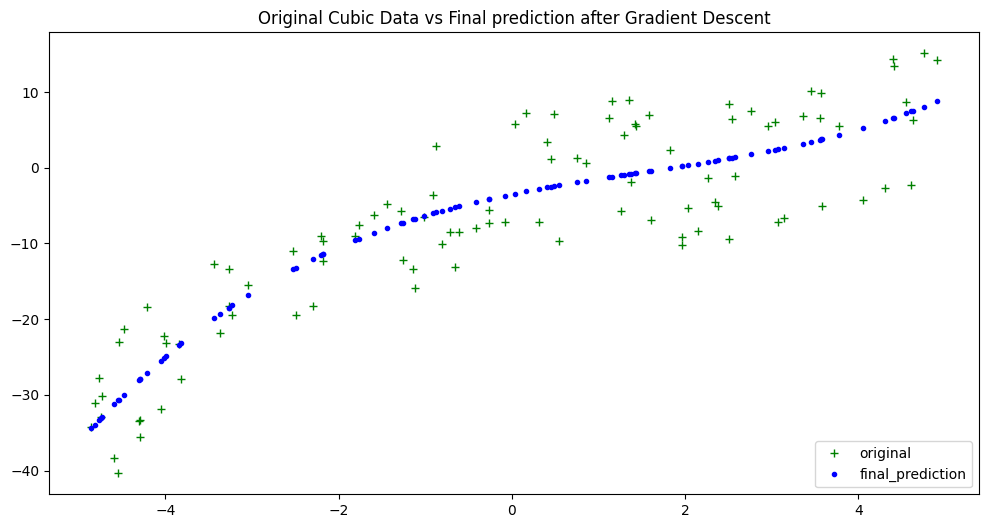

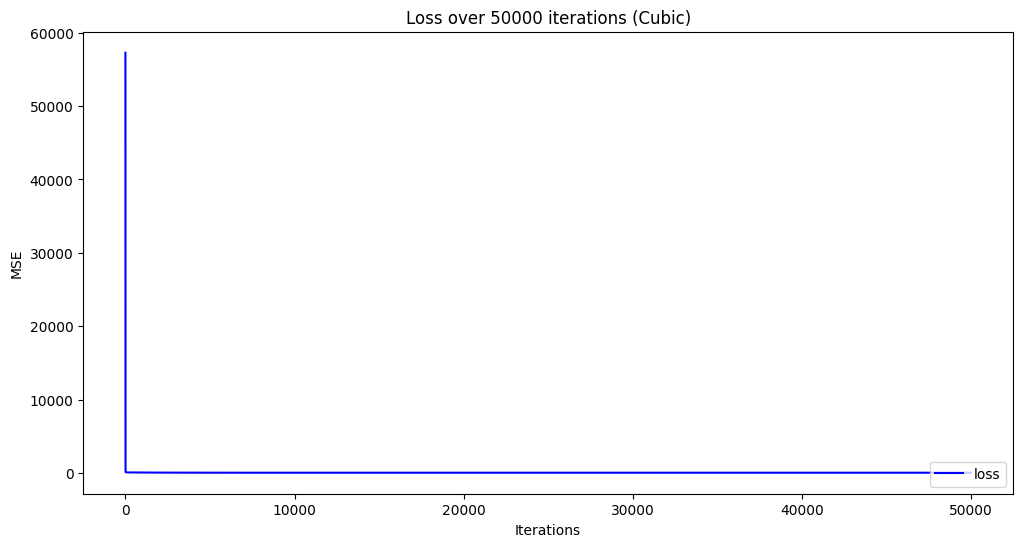

In [36]:
# Generate new data for a cubic polynomial
cubic_coeffs = [0.1, -0.5, 2, -3]
xs_cubic = np.random.uniform(-5, 5, 100)
ys_cubic = []
for x in xs_cubic:
    y = eval_cubic_jitter(cubic_coeffs, x, 10)
    ys_cubic.append(y)

ys_cubic = np.array(ys_cubic) # Convert to numpy array for MSE calculation

# Run gradient descent for the cubic polynomial
GD_cubic = gradient_descent_cubic(50000, 0.0001)

print(f"Original Cubic Coefficients: {cubic_coeffs}")
print(f"Final Coefficients predicted: {GD_cubic[1]}")
print(f"Final Loss: {GD_cubic[0]}")

# Plot the original data and the final prediction
plt.figure(figsize=(12, 6))
plt.plot(xs_cubic, ys_cubic, 'g+', label = 'original')
plt.plot(xs_cubic, GD_cubic[2], 'b.', label = 'final_prediction')
plt.title('Original Cubic Data vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(12, 6))
plt.plot(GD_cubic[3], 'b-', label = 'loss')
plt.title('Loss over 50000 iterations (Cubic)')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

## Change the polynomial

### Subtask:
Modify the `eval_2nd_degree` and `calc_gradient_2nd_poly_for_GD` functions to work with a different polynomial (e.g., a cubic function), run the gradient descent, and observe the results.

In [35]:
def gradient_descent_cubic(epochs, lr):
    """
    Perform gradient descent for a cubic polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = calc_gradient_cubic_for_GD(rand_coeffs_to_test, xs_cubic, ys_cubic, lr)
        rand_coeffs_to_test = new_coeffs
        losses.append(loss)
    print(losses[-10:]) # Print last 10 losses to see convergence
    return loss, new_coeffs, new_y_bar, losses

GD_cubic = gradient_descent_cubic(50000, 0.0001)

[np.float64(35.104993590883716), np.float64(35.10499314932938), np.float64(35.1049927078513), np.float64(35.10499226644942), np.float64(35.10499182512378), np.float64(35.104991383874356), np.float64(35.10499094270112), np.float64(35.10499050160406), np.float64(35.10499006058317), np.float64(35.10498961963843)]


In [34]:
def calc_gradient_cubic_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a cubic polynomial.

    Args:
        coeffs: a, b, c, and d for a cubic polynomial [ y = ax^3 + bx^2 + cx + d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the cubic polynomial, as a tuple of its parts for a,b,c,d respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_cubic(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_cubed = x ** 3
        x_squared = x ** 2
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (y - y_bar)
        d_s.append(partial_d)

    n = len(outputs_y)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d

    new_model_coeffs = (a_new, b_new, c_new, d_new)

    # update with these new coeffs:
    new_y_bar = eval_cubic(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


# Generate new data
cubic_coeffs = [0.1, -0.5, 2, -3]
xs_cubic = np.random.uniform(-5, 5, 100)
ys_cubic = []
for x in xs_cubic:
    y = eval_cubic_jitter(cubic_coeffs, x, 10)
    ys_cubic.append(y)

ys_cubic = np.array(ys_cubic) # Convert to numpy array for MSE calculation


# Task
Generate code and answers for each question in a proper way pointwise based on the provided requirements.

## Change the polynomial

### Subtask:
Modify the `eval_2nd_degree` and `calc_gradient_2nd_poly_for_GD` functions to work with a different polynomial (e.g., a cubic function), run the gradient descent, and observe the results.


**Reasoning**:
The first step is to define the `eval_cubic` function as requested.



**Reasoning**:
Next, modify the gradient calculation function to work with a cubic polynomial and generate new data.



**Reasoning**:
Initialize random coefficients for the cubic polynomial and run gradient descent using the new function and data.



1) You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your answer.

2) You would like to train a dog/cat image classifier using mini-batch gradient descent. You have already split your dataset into train, dev and test sets. The classes are balanced. You realize that within the training set, the images are ordered in such a way that all the dog images come first and all the cat images come after. A friend tells you: ”you absolutely need to shuffle your training set before the training procedure.” Is your friend right? Explain.

Here are the answers to your questions:

1.  **Full Batch Gradient Descent and Shuffling:**
    *   In full batch gradient descent, the gradient is calculated using the *entire* training dataset in each iteration.
    *   The order of the data points does not affect the calculation of this overall gradient.
    *   Therefore, shuffling the training data is **not necessary** for full batch gradient descent. The result of summing the gradients for all data points will be the same regardless of the order.

2.  **Mini-Batch Gradient Descent with Ordered Data and Shuffling:**
    *   In mini-batch gradient descent, the gradient is calculated using small, randomly selected subsets (mini-batches) of the training data.
    *   If the data is ordered (e.g., all dog images then all cat images), each mini-batch will initially contain examples from only one class.
    *   This will cause the gradient updates to be highly biased towards the class in the current mini-batch, leading to oscillations and slow or poor convergence.
    *   Your friend is **right**. Shuffling the training data is **absolutely necessary** for mini-batch gradient descent when the data is ordered to ensure that each mini-batch is representative of the overall data distribution and to promote stable convergence.